## Import Libraries

In [1]:
### framework files
import import_files as MrtRecommendationDependencies
from ridership_transformer import RidershipTransformer
from stationarity_test import StationarityTest

### standard libs
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### stat libs
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose


## Process Dataset

### Load Dataset

In [2]:
df = pd.read_csv(MrtRecommendationDependencies.get_dataset_path("cubao.csv"), parse_dates=['date'])

In [3]:
df.head(40)

,date,time,entry,exit
0,2019-01-01,04:00 - 04:59,0,0
1,2019-01-01,05:00 - 05:59,0,0
2,2019-01-01,06:00 - 06:59,239,22
3,2019-01-01,07:00 - 07:59,413,525
4,2019-01-01,08:00 - 08:59,454,627
5,2019-01-01,09:00 - 09:59,640,595
6,2019-01-01,10:00 - 10:59,866,842
7,2019-01-01,11:00 - 11:59,1176,892
8,2019-01-01,12:00 - 12:59,1251,1174
9,2019-01-01,13:00 - 13:59,1273,1206


### Transform Dataset

In [4]:
transformed_df = RidershipTransformer(df).transform()
transformed_df.head()

,datetime,entry,exit
0,2019-01-01 04:00:00,0,0
1,2019-01-01 05:00:00,0,0
2,2019-01-01 06:00:00,239,22
3,2019-01-01 07:00:00,413,525
4,2019-01-01 08:00:00,454,627


In [5]:
entry_df = transformed_df.drop('exit', axis=1)
entry_df.set_index('datetime', inplace=True)
entry_df.sort_index(inplace=True)
entry_df.head(20)

,entry
datetime,
2018-07-01 04:00:00,299
2018-07-01 05:00:00,1549
2018-07-01 06:00:00,1007
2018-07-01 07:00:00,971
2018-07-01 08:00:00,1501
2018-07-01 09:00:00,1467
2018-07-01 10:00:00,2176
2018-07-01 11:00:00,1730
2018-07-01 12:00:00,2145


### Visualize Data

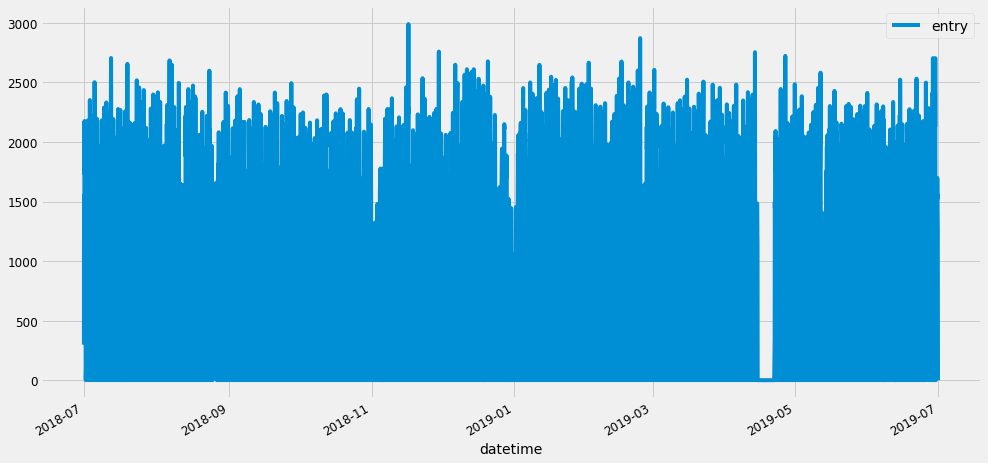

In [17]:
entry_df.plot(figsize=(15,8))

### Seasonal Decomposition

In [7]:
two_week_copy = entry_df[0:2240].copy()
# two_week_copy = two_week_copy[two_week_copy.entry > 0]

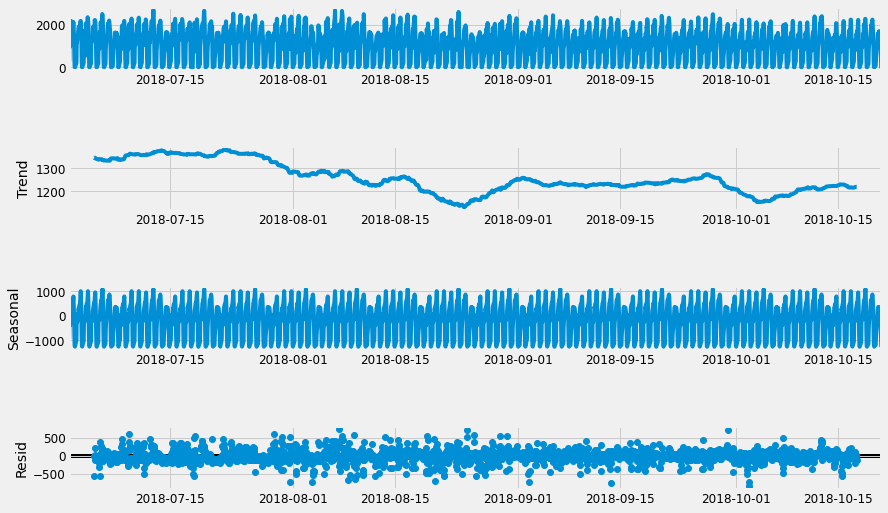

In [8]:
decomp = seasonal_decompose(two_week_copy,period=140)
fig = decomp.plot()
fig.set_size_inches(15, 8)

## Test for Stationarity 

### Augmented Dickey Fuller Test

[ADF Test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

**Test for stationarity**: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In [9]:
StationarityTest.perform_adfuller(two_week_copy,lag=140)

Test Statistic                   -1.151447
p-value                           0.694126
#Lags Used                      140.000000
Number of Observations Used    2099.000000
Critical Value (1%)              -3.433469
Critical Value (5%)              -2.862918
Critical Value (10%)             -2.567504
dtype: float64


### Kwiatkowski-Phillips-Schmidt-Shin Test

[KPSS Test](https://en.wikipedia.org/wiki/KPSS_test)

**Test for stationarity**: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary)

In [10]:
StationarityTest.perform_kpss(two_week_copy,lag=140)

Test Statistic             0.227832
p-value                    0.010000
Lags Used                140.000000
Critical Value (10%)       0.119000
Critical Value (5%)        0.146000
Critical Value (2.5%)      0.176000
Critical Value (1%)        0.216000
dtype: float64


In [11]:
StationarityTest.perform_kpss(two_week_copy,lag=140,regression='c')

Test Statistic             1.095554
p-value                    0.010000
Lags Used                140.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


### Seasonal Differencing

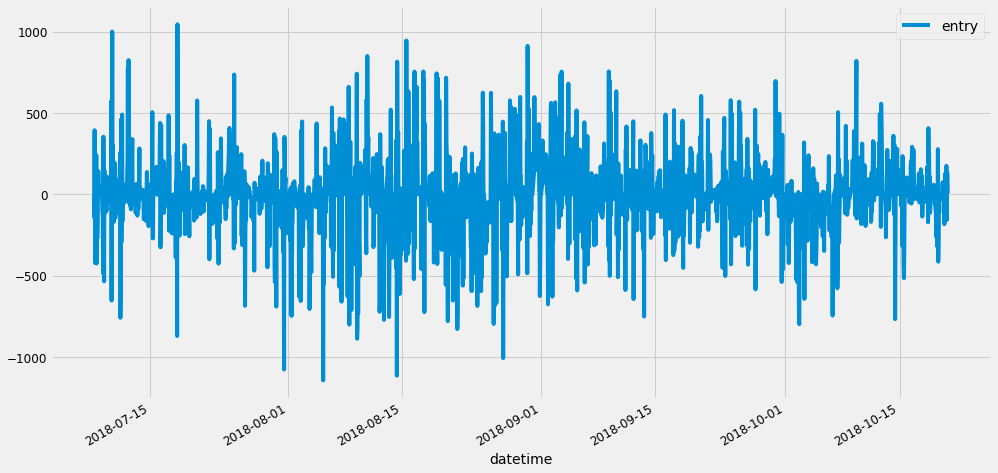

In [12]:
daily_differencing = two_week_copy.diff(periods=140).dropna()
daily_differencing.plot(figsize=(15,8))

In [13]:
StationarityTest.perform_adfuller(daily_differencing)

Test Statistic                -7.012317e+00
p-value                        6.871331e-10
#Lags Used                     1.900000e+01
Number of Observations Used    2.080000e+03
Critical Value (1%)           -3.433498e+00
Critical Value (5%)           -2.862931e+00
Critical Value (10%)          -2.567510e+00
dtype: float64


In [14]:
StationarityTest.perform_kpss(daily_differencing)

Test Statistic            0.09015
p-value                   0.10000
Lags Used                26.00000
Critical Value (10%)      0.11900
Critical Value (5%)       0.14600
Critical Value (2.5%)     0.17600
Critical Value (1%)       0.21600
dtype: float64


In [15]:
StationarityTest.perform_kpss(daily_differencing,regression='c')

Test Statistic            0.148257
p-value                   0.100000
Lags Used                26.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


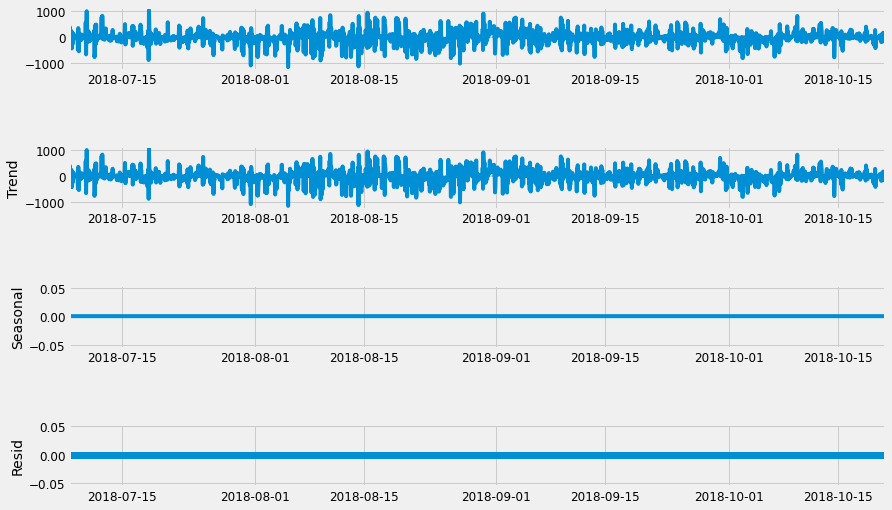

In [16]:
seasonal_decompose(daily_differencing,freq=1).plot().set_size_inches(15,8)